## Algorithm

A simple gradient Descent Algorithm is as follows:
1. Obtain a function to minimize F(x)

2. Initialize a value x from which to start the descent or optimization from

3. Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value

4. Obtain the derivative of that value x (the descent)

5. Proceed to descend by the derivative of that value multiplied by the learning rate

6. Update the value of x with the new value descended to

7. Check your stop condition to see whether to stop

8. If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

### Let us implement this in Python

We will implement a simple representation of gradient descent using python. 

We will create an arbitrary loss function and attempt to find a local minimum value for that function— f(x) = x³ — 3x² + 7

#### Step 1

We will first visualize this function with a set of values ranging from -1 and 3 (arbitrarily chosen to ensure steep curve)

In [53]:
## Set up libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
def curve (x):
    return x**3 - 3*x**2 + 7

In [55]:
## Creating the data
# 1000 random numbers between -1 and 3
x = 4 * np.random.rand(1000,1) - 1
# Sorting them
x = np.array(pd.DataFrame(x).sort_values(by = 0))
# Generate y (f(x)=x^3+3*x^2+7)
y = curve(x)

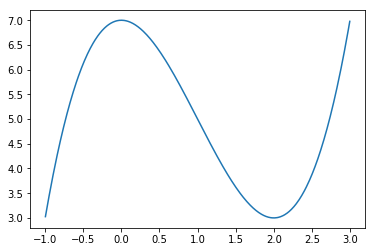

In [56]:
## Plotting x and y
plt.plot(x,y)
plt.show()

#### Step 2

We will then proceed to make two functions for the gradient descent implementation:

The first is a derivative function: 


This function takes in a value of x and returns its derivative based on the initial function we specified. It is shown below:

In [47]:
def deriv(x):
    # Generate derivative (f(x) = x^3 - 3*x^2 + 7; f'(x) = 3x^2 - 6x)
    x_deriv = 3*x**2-6*x
    return x_deriv

#### Step 3

This function takes in an initial or previous value for x, updates it based on steps taken via the learning rate and outputs the most minimum value of x that reaches the stop condition. 

The function will also print out the minimum value of x as well as the number of steps or descents it took to reach that value.

In [72]:
def step(x_new, x_prev, precision, l_r):
    
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_new - a starting value of x that will get updated based on the learning rate
    
    x_prev - the previous value of x that is getting updated to the new one
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    x_hist = np.array([])
    y_hist = np.array([])

    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
        # change the value of x
        x_prev = x_new
        # get the derivation of the old value of x
        x_deriv_prev = deriv(x_prev)        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev - x_deriv_prev * l_r
        # append the new value of x to a list of all x-s for later visualization of path
        x_hist = np.append(x_hist,x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_hist = np.append(y_hist,curve(x_new))

    # Print Results    
    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_hist)))
    
    # Create plot to show Gradient descent, 
    plt.plot(x,y)
    plt.plot(x_hist,y_hist,"r.")
    plt.show()

#### Step 4

Local minimum occurs at: 1.9980265135950486
Number of steps: 24


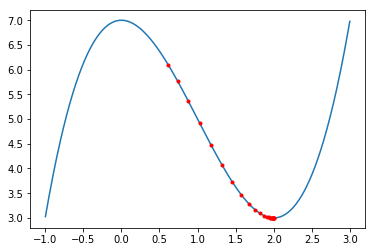

In [75]:
#Implement gradient descent (all the arguments are arbitrarily chosen)
step(0.5, 0, 0.001, 0.05)